In [1]:
import matplotlib
import matplotlib.pyplot as plt
import time #to have today's date
timestr = time.strftime("%Y%m%d")

In [2]:
#get the dataframe with each paragraph from another notebook
%run ./p_03_prepare_text_paper.ipynb
#df_all_interviews_qa dataframe with each document (original text), the respective country and actor classification
#df_paras_and_clean dataframe with the original text and the clean words for each document
#list_wordcount_drop = [0, 1, 2, 5, 7, 10, 20, 50]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mann\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#merge the df_all_interviews with the df_paras_and_clean to get clean words for each interview
df_basis = df_all_interviews.merge(df_paras_and_clean)
##the lenght should be the lenght of df_paras_and_clean, but: len(df_basis) = 5341. 

In [5]:
#add column with the number of words
for x in df_basis.index:
    df_basis.loc[x,'num_words_Text'] = len(df_basis.loc[x, 'Text'].strip().split(" "))
    df_basis.loc[x,'num_words_Clean'] = len(df_basis.loc[x, 'Clean_words'])

In [6]:
#check: what's the average lenght of the original text for lenght of clean doc = range(0,10)
list_range_x = list(range(1,11))

In [7]:
#drop all documents, with clean words len >x
df_basis_short = pd.DataFrame()
for x in df_basis.index:
    if df_basis.loc[x, 'num_words_Clean'] <= max(list_range_x):
        df_basis_short = df_basis_short.append(df_basis.loc[x,:])
df_basis_short.reset_index(drop=True, inplace=True)

## make boxplots

### for each x

In [8]:
#make df, each column is a clean word length and the rows are original text lenghts
df_x_col = pd.DataFrame() 
for x in list_range_x:
    df_x = df_basis[df_basis['num_words_Clean']==x][['num_words_Text']].rename(columns=({'num_words_Text':x}))
    df_x.reset_index(drop=True, inplace=True)
    df_x_col = pd.concat([df_x_col, df_x], axis=1).reset_index(drop=True) 

In [9]:
#do table with the stats
df_equal_x_stats = df_x_col.describe()
df_equal_x_stats.to_csv('.//results//LDA_set_parameters//word_drop_lda//qa_df_equal_x_stats_'+timestr+'.csv',
    sep=';', decimal=',')

c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


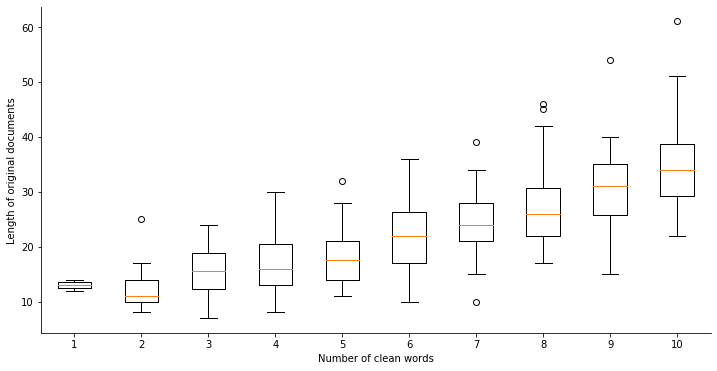

In [10]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.boxplot([df_x_col[1].dropna(),df_x_col[2].dropna(), df_x_col[3].dropna(),df_x_col[4].dropna(),\
          df_x_col[5].dropna(),df_x_col[6].dropna(), df_x_col[7].dropna(), df_x_col[8].dropna(),\
            df_x_col[9].dropna(),df_x_col[10].dropna()])

for x in ['top', 'right']: #left
    ax1.spines[x].set_visible(False) 

ax1.set_xlabel('Number of clean words', fontsize=10)
ax1.set_ylabel('Length of original documents', fontsize=10)
ax1.set_xticklabels(list(df_x_col.columns), fontsize=10)

#save graph
plt.savefig('.\\results\\overview_paragraphs\\qa_Lenghts_original_for_clean=x_'+timestr+'.png', \
                bbox_inches="tight") #V01 is without PART; FDG; NOX
    
plt.show()

### for all answers <=x

In [11]:
#make graph, check boxplots for all docs with <=x words
#make graph, check boxplots when we only consider >x words
#make df, each column is a clean word length and the rows are original text lenghts
df_shorter_x = pd.DataFrame() 
list_wordcount_drop_no_0 = list_wordcount_drop.copy()
list_wordcount_drop_no_0.remove(0)
for x in list_wordcount_drop_no_0:
    df_x = df_basis[df_basis['num_words_Clean']<=x][['num_words_Text']].rename(columns=({'num_words_Text':'<='+str(x)}))
    df_x.reset_index(drop=True, inplace=True)
    df_shorter_x = pd.concat([df_shorter_x, df_x], axis=1).reset_index(drop=True) 

In [12]:
#do table with the stats
df_shorter_x_stats = df_shorter_x.describe()
df_shorter_x_stats.to_csv('.//results//LDA_set_parameters//word_drop_lda//qa_df_shorter_x_stats_'+timestr+'.csv',
    sep=';', decimal=',')

c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


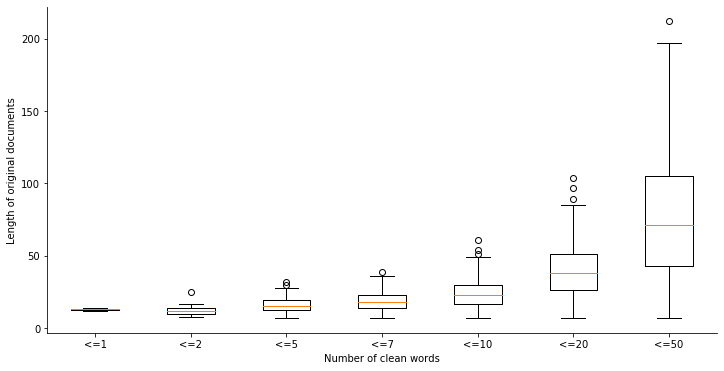

In [13]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.boxplot([df_shorter_x['<=1'].dropna(), df_shorter_x['<=2'].dropna(),df_shorter_x['<=5'].dropna(),\
          df_shorter_x['<=7'].dropna(),df_shorter_x['<=10'].dropna(), df_shorter_x['<=20'].dropna(), df_shorter_x['<=50'].dropna()])

for x in ['top', 'right']: #left
    ax1.spines[x].set_visible(False) 

ax1.set_xlabel('Number of clean words', fontsize=10)
ax1.set_ylabel('Length of original documents', fontsize=10)
ax1.set_xticklabels(list(df_shorter_x.columns), fontsize=10)

#save graph
plt.savefig('.\\results\\overview_paragraphs\\qa_Lenghts_original_for_clean_SHORTER_x_'+timestr+'.png', \
                bbox_inches="tight") #V01 is without PART; FDG; NOX
    
plt.show()

### for all docs >x

In [14]:
#make graph, check boxplots when we only consider >x words
#make df, each column is a clean word length and the rows are original text lenghts
df_longer_x = pd.DataFrame() 
for x in list_wordcount_drop:
    df_x = df_basis[df_basis['num_words_Clean']>x][['num_words_Text']].rename(columns=({'num_words_Text':'>'+str(x)}))
    df_x.reset_index(drop=True, inplace=True)
    df_longer_x = pd.concat([df_longer_x, df_x], axis=1).reset_index(drop=True) 

In [15]:
#do table with the stats
df_longer_x_stats = df_longer_x.describe()
df_longer_x_stats.to_csv('.//results//LDA_set_parameters//word_drop_lda//qa_df_longer_x_stats_'+timestr+'.csv',
    sep=';', decimal=',')

c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


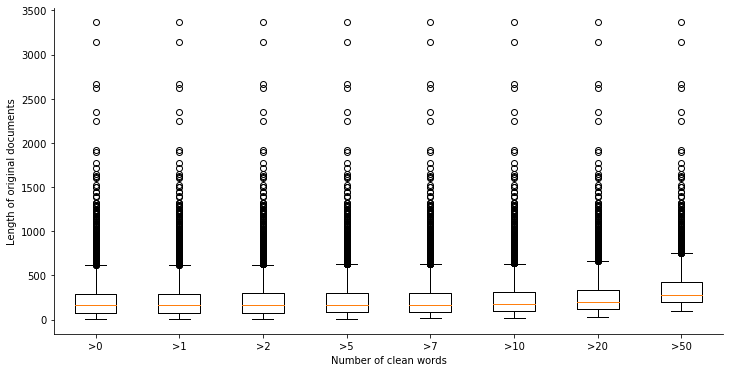

In [16]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.boxplot([df_longer_x['>0'].dropna(),df_longer_x['>1'].dropna(), df_longer_x['>2'].dropna(),df_longer_x['>5'].dropna(),\
          df_longer_x['>7'].dropna(),df_longer_x['>10'].dropna(), df_longer_x['>20'].dropna(), df_longer_x['>50'].dropna()])

for x in ['top', 'right']: #left
    ax1.spines[x].set_visible(False) 

ax1.set_xlabel('Number of clean words', fontsize=10)
ax1.set_ylabel('Length of original documents', fontsize=10)
ax1.set_xticklabels(list(df_longer_x.columns), fontsize=10)

#save graph
plt.savefig('.\\results\\overview_paragraphs\\qa_Lenghts_original_for_clean_BIGGER_x_'+timestr+'.png', \
                bbox_inches="tight") #V01 is without PART; FDG; NOX
    
plt.show()

c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


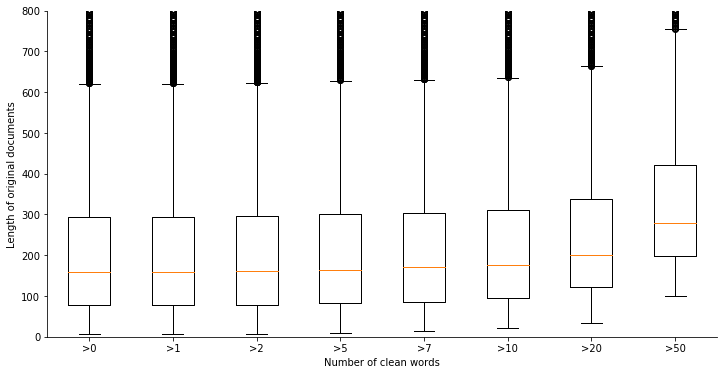

In [17]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.boxplot([df_longer_x['>0'].dropna(),df_longer_x['>1'].dropna(), df_longer_x['>2'].dropna(),df_longer_x['>5'].dropna(),\
          df_longer_x['>7'].dropna(),df_longer_x['>10'].dropna(), df_longer_x['>20'].dropna(), df_longer_x['>50'].dropna()])

for x in ['top', 'right']: #left
    ax1.spines[x].set_visible(False) 

ax1.set_xlabel('Number of clean words', fontsize=10)
ax1.set_ylabel('Length of original documents', fontsize=10)
ax1.set_xticklabels(list(df_longer_x.columns), fontsize=10)

#change y-axis range
plt.ylim(0, 800)

#save graph
plt.savefig('.\\results\\overview_paragraphs\\qa_Lenghts_original_for_clean_BIGGER_x_yrange_'+timestr+'.png', \
                bbox_inches="tight") #V01 is without PART; FDG; NOX
    
plt.show()

## show clean words of short documents for each country

In [18]:
#make df to see the short docs (clean words) per country
df_short_words_country = pd.DataFrame()
for x in set(df_basis['Country']):
    df_x = df_basis[df_basis['Country']==x]
    df_x = df_x.rename(columns={'Clean_words':x+'_Clean'}).sort_values('num_words_Clean')\
            [[x+'_Clean']].reset_index(drop=True)
    df_short_words_country = pd.concat([df_short_words_country, df_x], axis=1).reset_index(drop=True) 

In [19]:
df_short_words_country.to_csv('.//results//overview_paragraphs//qa_Country_short_clean_words_'+timestr+'_V01.csv',
    sep=';', decimal=',')

## show documents per country below word limit

### for number of documents

In [20]:
dict_counts = {}
for c_a in ['Country', 'class']:
    for text_clean in ['num_words_Text', 'num_words_Clean']:
        df_count_words = df_basis.groupby([c_a,text_clean], as_index=False)[['no_interview']].count()
        piv_count_words = pd.pivot_table(df_count_words, values="no_interview",\
                         index=[text_clean], columns=[c_a], fill_value=0)
        piv_count_words_clustered = piv_count_words.copy()
        piv_count_words_clustered.reset_index(inplace=True)
        piv_count_words_clustered.columns.name = None
        piv_count_words_clustered.index.rename('Index', inplace=True)

        df_clust = pd.DataFrame()
        list_a = list(piv_count_words_clustered.columns)
        list_a.remove(text_clean)

        for x in [1,2,5,7,10,20,50,75,100, 200,500, 1000, 2000, 5000, 10000]:
            var_n = 0
            dict_row = {}
            df = piv_count_words_clustered[piv_count_words_clustered[text_clean]<=x]
            for y in list_a:
                var_no = df[y].sum()
                dict_row[y] = var_no
                var_n += var_no
            dict_row['<=x'] = x
            dict_row['total'] = var_n
            df_clust = df_clust.append(dict_row, ignore_index=True)
        dict_counts[c_a+'_'+text_clean] = df_clust
        df_clust.to_csv('.//results//overview_paragraphs//qa_Paragraphs_total_'+c_a+'_for_'+text_clean+'_'+timestr+'_V01.csv',
        sep=';', decimal=',')

### for share of documents per country

In [21]:
dict_counts = {}
for c_a in ['Country', 'class']:
    for text_clean in ['num_words_Text', 'num_words_Clean']:
        df_count_words = df_basis.groupby([c_a,text_clean], as_index=False)[['no_interview']].count()
        piv_count_words = pd.pivot_table(df_count_words, values="no_interview",\
                         index=[text_clean], columns=[c_a], fill_value=0)
        #calculate shares for each country/group
        piv_count_words_share = pd.DataFrame()
        for col in piv_count_words.columns:
            piv_count_words_share[col] = piv_count_words[col]/piv_count_words[col].sum()*100
        
        piv_count_words_clustered = piv_count_words_share.copy()
        piv_count_words_clustered.reset_index(inplace=True)
        piv_count_words_clustered.columns.name = None
        piv_count_words_clustered.index.rename('Index', inplace=True)

        df_clust = pd.DataFrame()
        list_a = list(piv_count_words_clustered.columns)
        list_a.remove(text_clean)

        for x in [1,2,5,7,10,20,50,75,100, 200,500, 1000, 2000, 5000, 10000]:
            var_n = 0
            dict_row = {}
            df = piv_count_words_clustered[piv_count_words_clustered[text_clean]<=x]
            for y in list_a:
                var_no = df[y].sum()
                dict_row[y] = var_no
                var_n += var_no
            dict_row['<=x'] = x
            dict_row['total'] = var_n
            df_clust = df_clust.append(dict_row, ignore_index=True)
        df_clust = df_clust.round(1)
        dict_counts[c_a+'_'+text_clean] = df_clust
        df_clust.to_csv('.//results//overview_paragraphs//qa_Paragraphs_share_'+c_a+'_for_'+text_clean+'_'+timestr+'_V01.csv',
        sep=';', decimal=',')